#**Import LIbrary**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#**Generate Data**

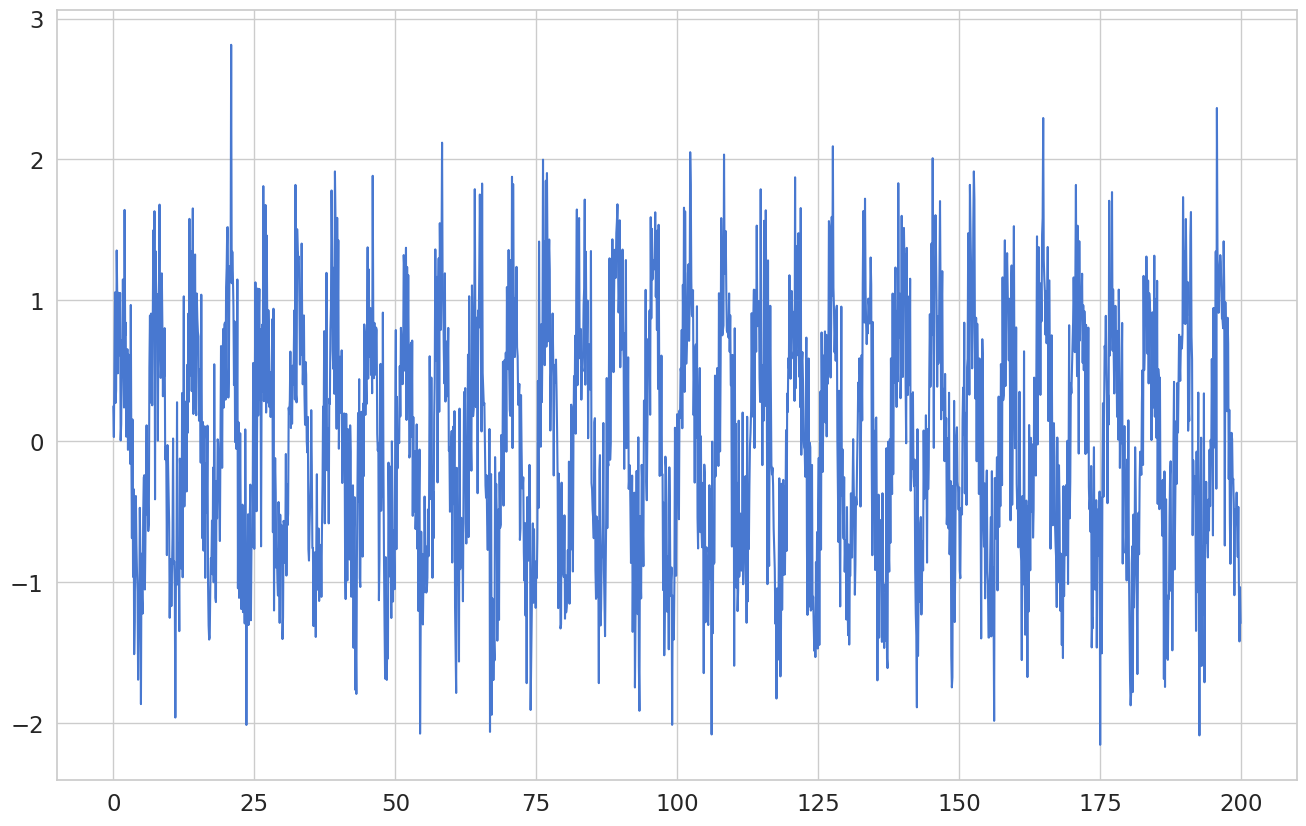

In [ ]:
# Set up plotting styles
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10  # Set the figure size
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Generate synthetic sine wave data
data_time = np.arange(0, 200, 0.1)
sin_values = np.sin(data_time) + np.random.normal(scale=0.5, size=len(data_time))
plt.plot(data_time, sin_values, label='sine (with noise)');

# **Data Preprocessing**

In [ ]:
# Create a DataFrame from the synthetic data
data_full = pd.DataFrame(dict(sine=sin_values), index=data_time, columns=['sine'])

# Split the data into training and test sets
len_train = int(len(data_full) * 0.8)
train, test = data_full.iloc[0:len_train], data_full.iloc[len_train:len(data_full)]

# Function to generate data sequences
def gen_data(X, y, num_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - num_steps):
        Xs.append(X.iloc[i:(i + num_steps)].values)
        ys.append(y.iloc[i + num_steps])
    return np.array(Xs), np.array(ys)

# Generate training and test sequences
num_steps = 10
trainX, trainY = gen_data(train, train.sine, num_steps)
testX, testY = gen_data(test, test.sine, num_steps)

# Reshape data for CNN
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], 1))  # (samples, timesteps, channels)
testX = testX.reshape((testX.shape[0], testX.shape[1], 1))

#**Creating the Convolutional Model**

In [ ]:
# Build and compile the CNN model
cnn_model = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1)
])
cnn_model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

#**Train Model**

In [ ]:
# Train the model
history = cnn_model.fit(
    trainX, trainY,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    shuffle=False,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
)

Epoch 1/30
90/90 [==============================] - 1s 3ms/step - loss: 0.3889 - val_loss: 0.3917
Epoch 2/30
90/90 [==============================] - 0s 2ms/step - loss: 0.3303 - val_loss: 0.3886
Epoch 3/30
90/90 [==============================] - 0s 2ms/step - loss: 0.3257 - val_loss: 0.3892
Epoch 4/30
90/90 [==============================] - 0s 2ms/step - loss: 0.3236 - val_loss: 0.3887
Epoch 5/30
90/90 [==============================] - 0s 2ms/step - loss: 0.3218 - val_loss: 0.3887
Epoch 6/30
90/90 [==============================] - 0s 3ms/step - loss: 0.3197 - val_loss: 0.3896
Epoch 7/30
90/90 [==============================] - 0s 2ms/step - loss: 0.3183 - val_loss: 0.3897
Epoch 8/30
90/90 [==============================] - 0s 2ms/step - loss: 0.3166 - val_loss: 0.3898
Epoch 9/30
90/90 [==============================] - 0s 3ms/step - loss: 0.3151 - val_loss: 0.3894
Epoch 10/30
90/90 [==============================] - 0s 2ms/step - loss: 0.3133 - val_loss: 0.3901
Epoch 11/30
90/90 [

# **Model Evaluation**

13/13 [==============================] - 0s 1ms/step - loss: 0.0000e+00


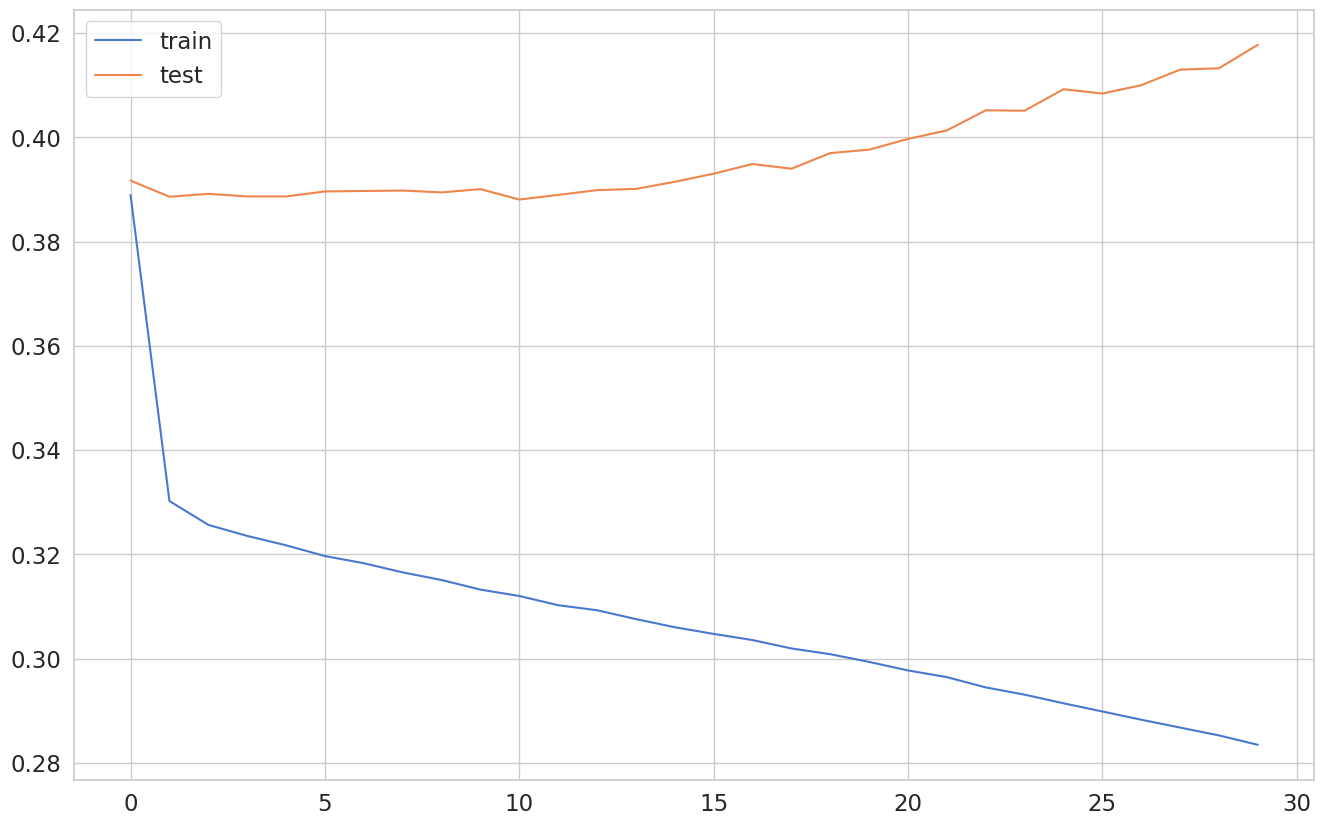

In [ ]:
cnn_model.evaluate(testX)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

# **Predicting a new Point in the Future**


13/13 [==============================] - 0s 1ms/step


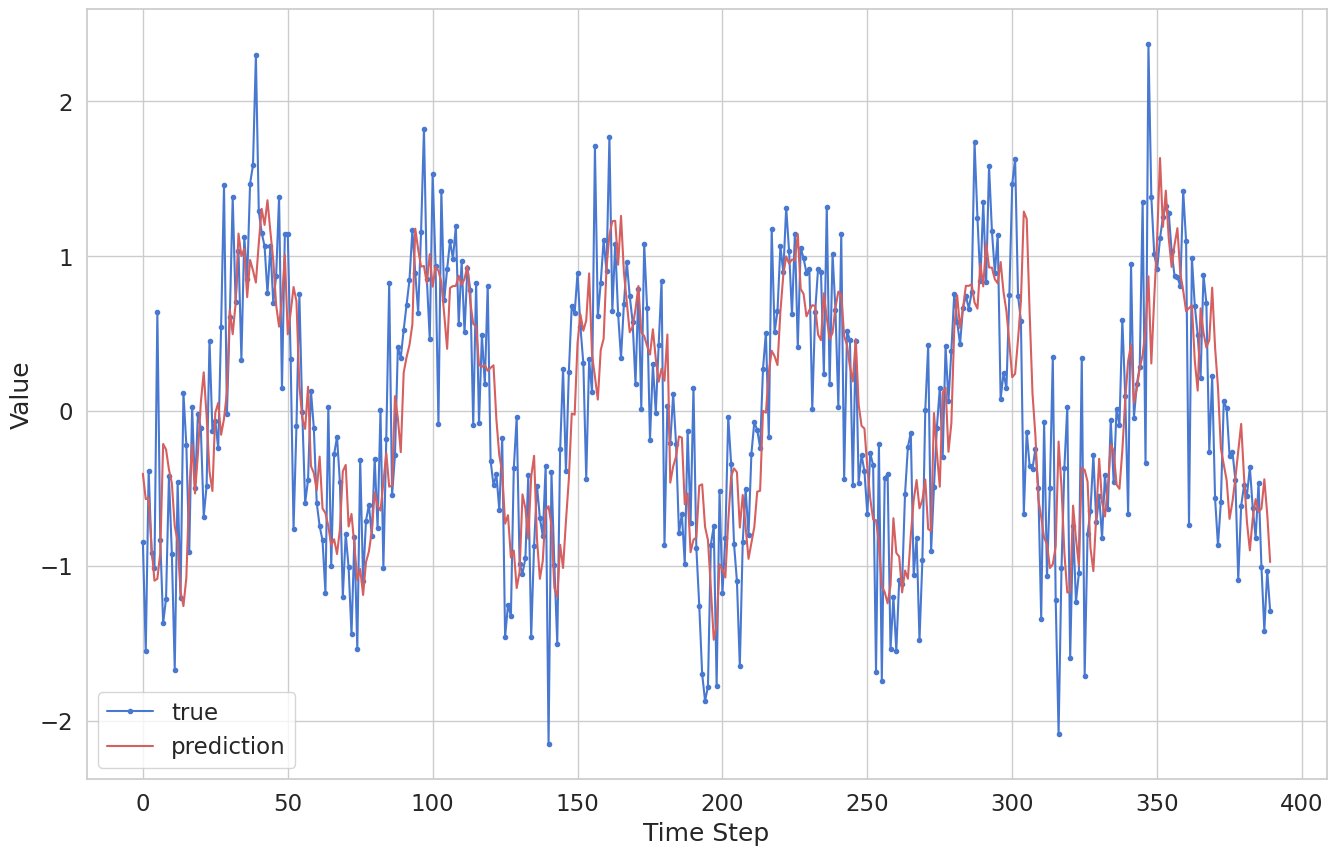

Mean Squared Error (MSE): 0.3417075809543519
Root Mean Squared Error (RMSE): 0.5845575942149344
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       258
           1       0.76      0.70      0.73       132

    accuracy                           0.82       390
   macro avg       0.81      0.79      0.80       390
weighted avg       0.82      0.82      0.82       390



In [ ]:
# Generate predictions
y_pred = cnn_model.predict(testX)

# Plot true values vs. predictions
plt.plot(testY, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE
mse = mean_squared_error(testY, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

from sklearn.metrics import classification_report

# Convert continuous values to binary based on threshold (e.g., 0.5)
threshold = 0.5
binary_pred = (y_pred >= threshold).astype(int)
binary_testY = (testY >= threshold).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(binary_testY, binary_pred))